In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
mcdonald=pd.read_csv('/content/mcdonalds.csv')

# **Data Preprocessing**

In [ ]:
data = mcdonald
mcdonald.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


<Figure size 1000x1000 with 0 Axes>

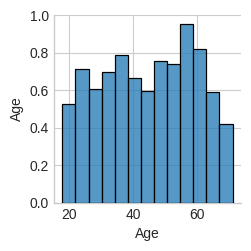

In [ ]:
plt.figure(figsize=(10,10),dpi=100)
sb.pairplot(mcdonald)

In [ ]:
mcdonald.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
mcdonald.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [ ]:
mcdonald.shape

(1453, 15)

In [ ]:
mcdonald.isnull().sum()

,0
yummy,0
convenient,0
spicy,0
fattening,0
greasy,0
fast,0
cheap,0
tasty,0
expensive,0
healthy,0


In [ ]:
mcdonald.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [ ]:
for col in mcdonald.columns:
    print(f"Unique values for column '{col}':")
    print(mcdonald[col].unique())
    print("-" * 30)

Unique values for column 'yummy':
['No' 'Yes']
------------------------------
Unique values for column 'convenient':
['Yes' 'No']
------------------------------
Unique values for column 'spicy':
['No' 'Yes']
------------------------------
Unique values for column 'fattening':
['Yes' 'No']
------------------------------
Unique values for column 'greasy':
['No' 'Yes']
------------------------------
Unique values for column 'fast':
['Yes' 'No']
------------------------------
Unique values for column 'cheap':
['Yes' 'No']
------------------------------
Unique values for column 'tasty':
['No' 'Yes']
------------------------------
Unique values for column 'expensive':
['Yes' 'No']
------------------------------
Unique values for column 'healthy':
['No' 'Yes']
------------------------------
Unique values for column 'disgusting':
['No' 'Yes']
------------------------------
Unique values for column 'Like':
['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']
-------------

In [ ]:
for col in mcdonald.columns:
  print("Value Counts for column ",col)
  print(mcdonald[col].value_counts())
  print("-"*30)

Value Counts for column  yummy
yummy
Yes    803
No     650
Name: count, dtype: int64
------------------------------
Value Counts for column  convenient
convenient
Yes    1319
No      134
Name: count, dtype: int64
------------------------------
Value Counts for column  spicy
spicy
No     1317
Yes     136
Name: count, dtype: int64
------------------------------
Value Counts for column  fattening
fattening
Yes    1260
No      193
Name: count, dtype: int64
------------------------------
Value Counts for column  greasy
greasy
Yes    765
No     688
Name: count, dtype: int64
------------------------------
Value Counts for column  fast
fast
Yes    1308
No      145
Name: count, dtype: int64
------------------------------
Value Counts for column  cheap
cheap
Yes    870
No     583
Name: count, dtype: int64
------------------------------
Value Counts for column  tasty
tasty
Yes    936
No     517
Name: count, dtype: int64
------------------------------
Value Counts for column  expensive
expensive
N

In [ ]:
mcdonald['Like'] = mcdonald['Like'].str.extract(r'([-+]?\d+)').astype(float)
print("Unique values for column 'Like' after adjustment:")
print(mcdonald['Like'].unique())

Unique values for column 'Like' after adjustment:
[-3.  2.  1.  4.  5. -5. -2.  3.  0. -4. -1.]


In [ ]:
mcdonald

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3.0,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2.0,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1.0,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4.0,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2.0,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-5.0,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,2.0,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,3.0,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,4.0,41,Every three months,Male


In [ ]:
categorical_columns = mcdonald.select_dtypes(include=['object']).columns.tolist()

print("List of categorical columns (based on object dtype):")
print(categorical_columns)

List of categorical columns (based on object dtype):
['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'VisitFrequency', 'Gender']


In [ ]:
#Encode categorical values

labelencoder=LabelEncoder()
for column in categorical_columns:
  mcdonald[column]=labelencoder.fit_transform(mcdonald[column])

In [ ]:
mcdonald

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3.0,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2.0,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1.0,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4.0,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2.0,49,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5.0,47,5,1
1449,1,1,0,1,0,0,1,1,0,1,0,2.0,36,4,0
1450,1,1,0,1,0,1,0,1,1,0,0,3.0,52,3,0
1451,1,1,0,0,0,1,1,1,0,1,0,4.0,41,0,1


In [ ]:
categorical = mcdonald.columns[0:11]
categorical

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting'],
      dtype='object')

# **Data Visualization**

In [ ]:
gender = mcdonald['Gender'].value_counts()
gender

,count
Gender,
0,788
1,665


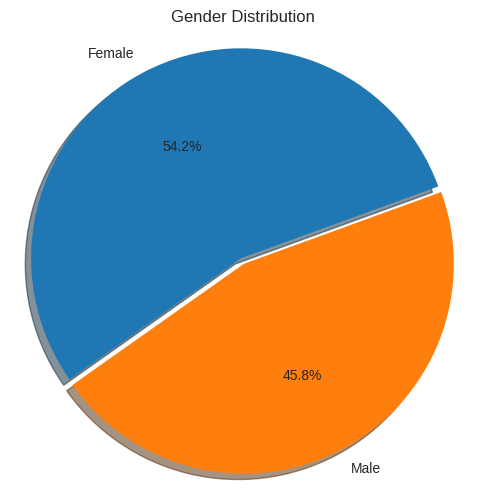

In [ ]:
gender = mcdonald['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender.values, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=20, explode = (0.03,0),shadow = True)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

<ipython-input-151-3c2de7d03173>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=mcdonald, x='Gender', palette='viridis')
<ipython-input-151-3c2de7d03173>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=mcdonald, x='VisitFrequency', order=mcdonald['VisitFrequency'].value_counts().index, palette='plasma')
<ipython-input-151-3c2de7d03173>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=mcdonald, x='Like', order=mcdonald['Like'].value_counts().index, palette='magma')


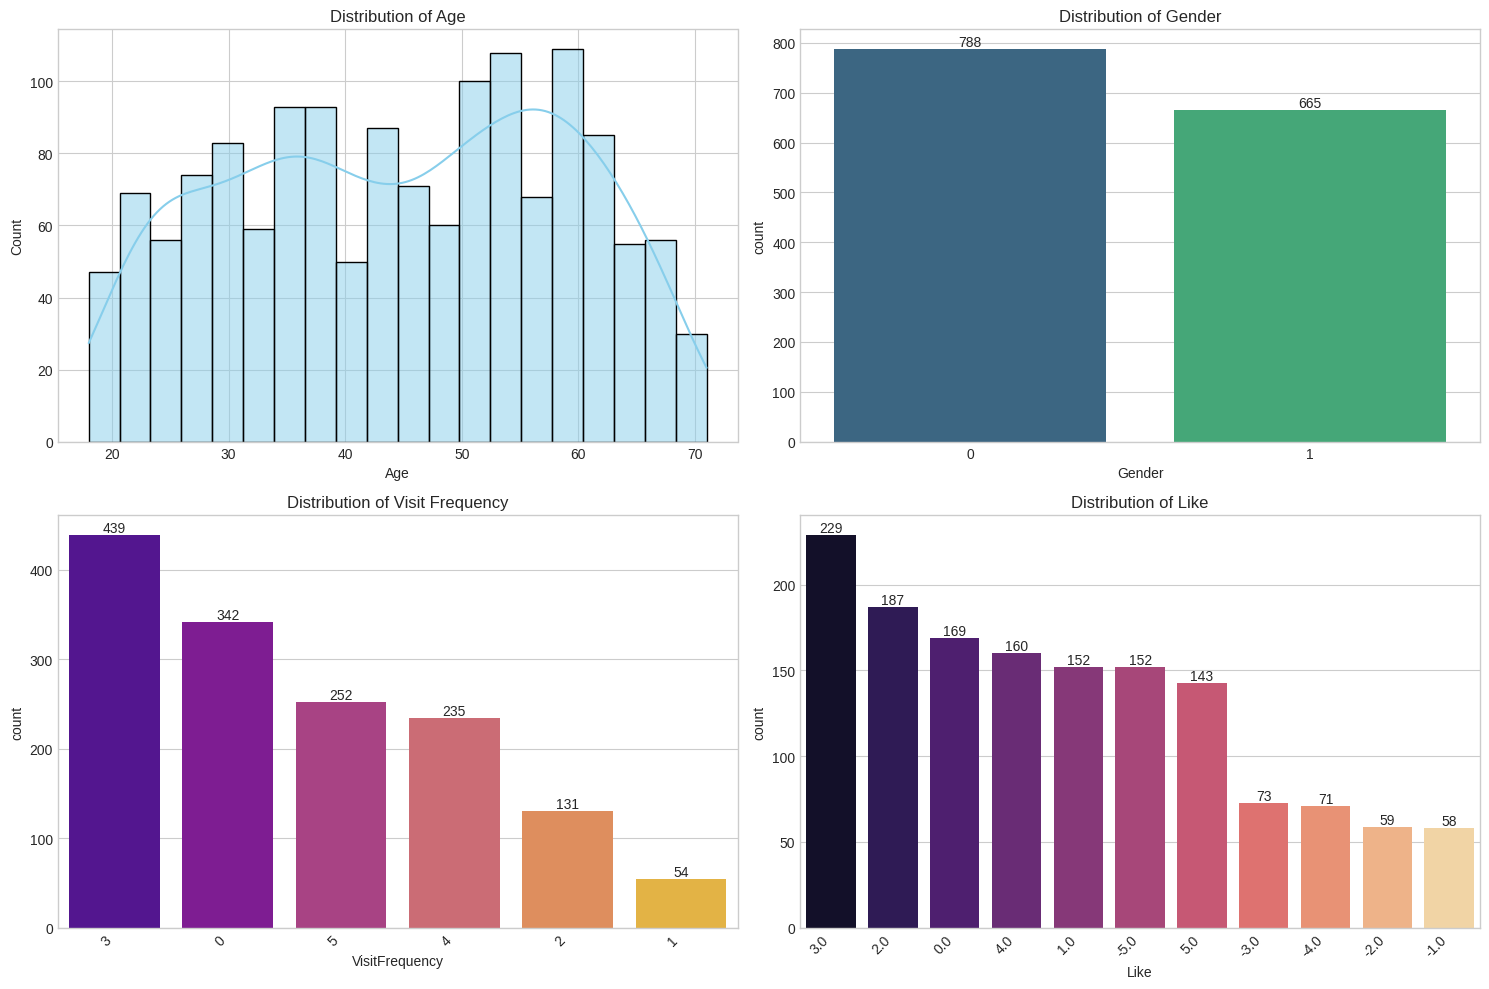

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sb.histplot(mcdonald['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')


plt.subplot(2, 2, 2)
sb.countplot(data=mcdonald, x='Gender', palette='viridis')
plt.title('Distribution of Gender')

for container in plt.gca().containers:
    plt.gca().bar_label(container)


plt.subplot(2, 2, 3)
sb.countplot(data=mcdonald, x='VisitFrequency', order=mcdonald['VisitFrequency'].value_counts().index, palette='plasma')
plt.title('Distribution of Visit Frequency')
plt.xticks(rotation=45, ha='right')

for container in plt.gca().containers:
    plt.gca().bar_label(container)

plt.subplot(2, 2, 4)
sb.countplot(data=mcdonald, x='Like', order=mcdonald['Like'].value_counts().index, palette='magma')
plt.title('Distribution of Like')
plt.xticks(rotation=45, ha='right')
for container in plt.gca().containers:
    plt.gca().bar_label(container)


plt.tight_layout()
plt.show()

<ipython-input-152-05a097b8d3b9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(


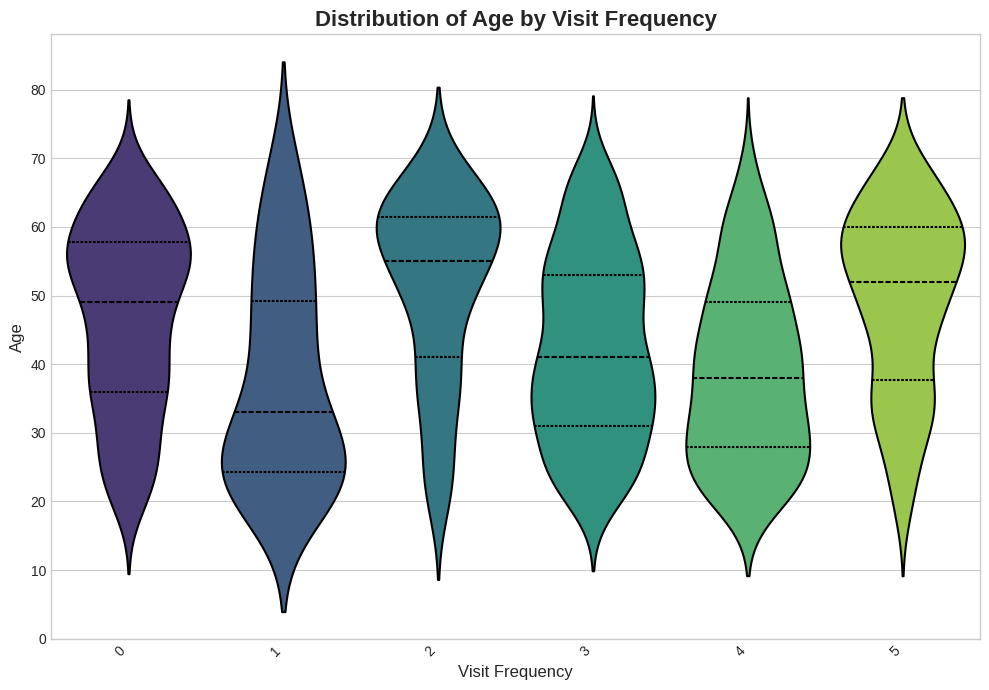

<ipython-input-152-05a097b8d3b9>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.swarmplot(
<ipython-input-152-05a097b8d3b9>:22: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sb.swarmplot(
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 18.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 40.2% of the points cannot be placed; you may want to decrease th

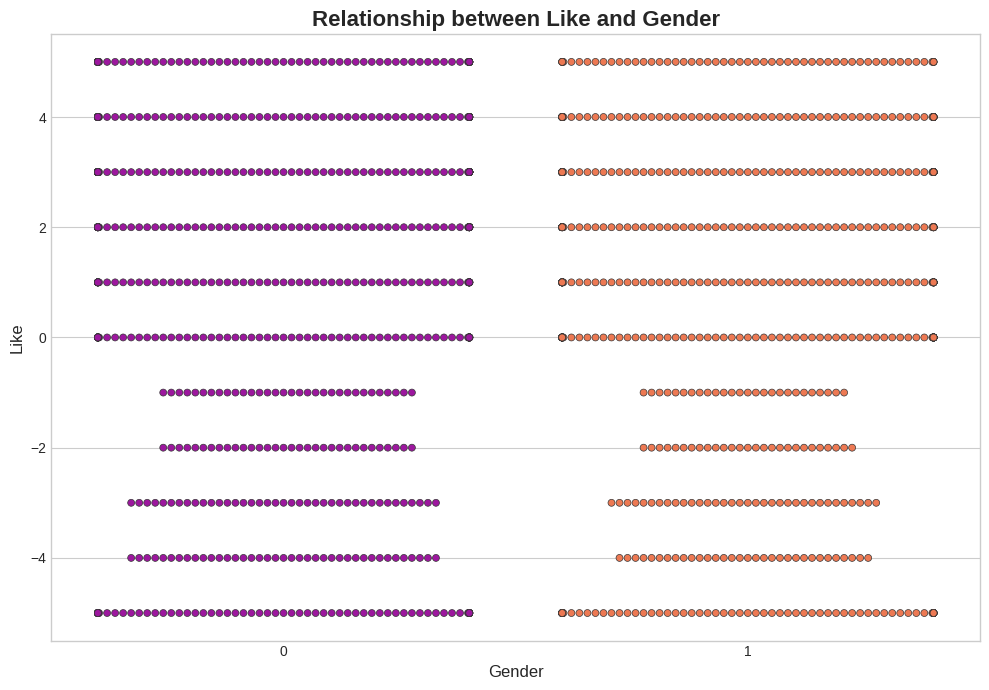

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(10, 7))
sb.violinplot(
    x='VisitFrequency',
    y='Age',
    data=mcdonald,
    palette='viridis',
    inner='quartile',
    linewidth=1.5,
    edgecolor='black'
)
plt.title('Distribution of Age by Visit Frequency', fontsize=16, fontweight='bold')
plt.xlabel('Visit Frequency', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 7))
sb.swarmplot(
    x='Gender',
    y='Like',
    data=mcdonald,
    palette='plasma',
    size=5,
    edgecolor='gray',
    linewidth=0.5
)
plt.title('Relationship between Like and Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Like', fontsize=12)
plt.tight_layout()
plt.show()

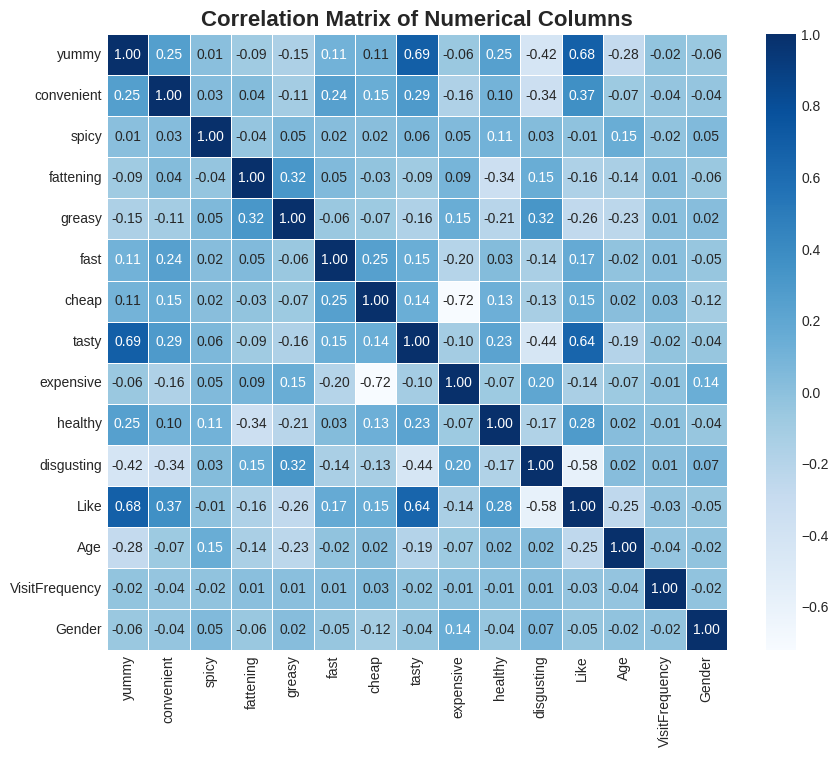

In [ ]:
correlation_matrix = mcdonald.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Columns', fontsize=16, fontweight='bold')
plt.show()

In [ ]:
mcdonald.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
mcdonald[['Age']] = scaler.fit_transform(mcdonald[['Age']])

In [ ]:
mcdonald.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3.0,1.153258,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2.0,0.449839,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1.0,1.223600,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4.0,1.715993,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2.0,0.309156,3,1


# **Data Segmentation**

In [ ]:
x=data.drop(columns=['Like', 'Age', 'Gender'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split as t

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)


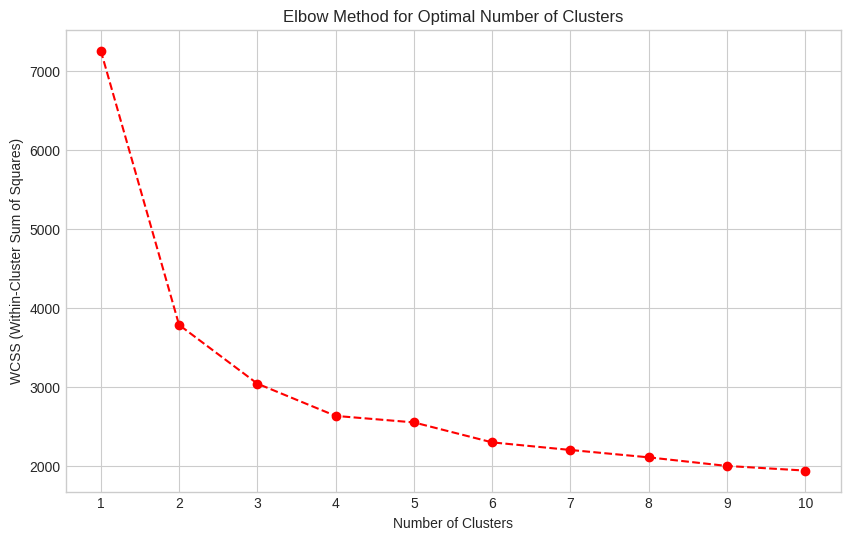

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--',color='red')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
clusters = 5

In [ ]:
kmeans=KMeans(n_clusters=clusters,random_state=4)
kmeans.fit(x)

KMeans(n_clusters=5, random_state=4)

In [ ]:
mcdonald['Cluster']=kmeans.labels_

In [ ]:
mcdonald

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3.0,1.153258,0,0,4
1,1,1,0,1,1,1,1,1,1,0,0,2.0,0.449839,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1.0,1.223600,0,0,4
3,1,1,0,1,1,1,1,1,0,0,1,4.0,1.715993,4,0,3
4,0,1,0,1,1,1,1,0,0,1,0,2.0,0.309156,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5.0,0.168472,5,1,1
1449,1,1,0,1,0,0,1,1,0,1,0,2.0,-0.605289,4,0,3
1450,1,1,0,1,0,1,0,1,1,0,0,3.0,0.520181,3,0,3
1451,1,1,0,0,0,1,1,1,0,1,0,4.0,-0.253579,0,1,0


In [ ]:
mcdonald['Cluster'].unique()

array([4, 0, 3, 2, 1], dtype=int32)

In [ ]:
x = mcdonald.drop(columns=['Like', 'Age', 'Gender'], axis=1)

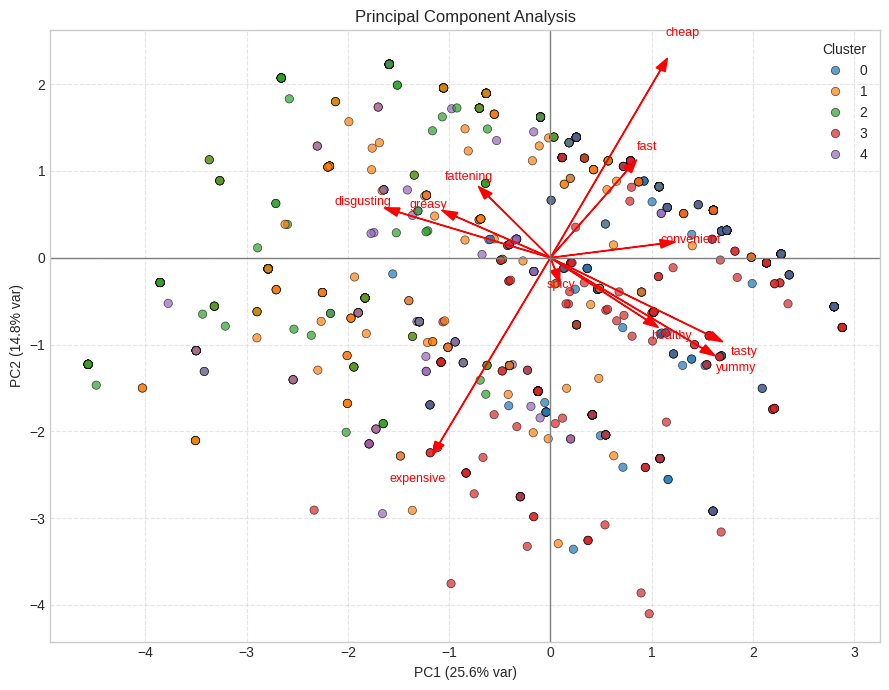

In [ ]:
features = [
    'yummy','convenient','spicy','fattening','greasy',
    'fast','cheap','tasty','expensive','healthy','disgusting'
]
X = mcdonald[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)

pc_df = pd.DataFrame(pcs, columns=['PC1','PC2'])
pc_df['Cluster'] = mcdonald['Cluster'].values

plt.figure(figsize=(9,7))
sb.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    palette='tab10',
    data=pc_df,
    alpha=0.7,
    edgecolor='k'
)


loadings = pca.components_.T

arrow_size, text_offset = 4.0, 4.5

for i, feature in enumerate(features):
    plt.arrow(
        0, 0,
        loadings[i,0]*arrow_size,
        loadings[i,1]*arrow_size,
        color='r',
        width=0.005,
        head_width=0.1,
        length_includes_head=True
    )
    plt.text(
        loadings[i,0]*text_offset,
        loadings[i,1]*text_offset,
        feature,
        color='r',
        ha='center', va='center',
        fontsize=9
    )


expl_var = pca.explained_variance_ratio_
plt.xlabel(f"PC1 ({expl_var[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({expl_var[1]*100:.1f}% var)")
plt.title("Principal Component Analysis")
plt.grid(True, linestyle='--', alpha=0.5)
plt.axhline(0, color='grey', linewidth=1)
plt.axvline(0, color='grey', linewidth=1)
plt.legend(title='Cluster', loc='best')
plt.tight_layout()
plt.show()


In [ ]:
X_cat = mcdonald[categorical]
y_cat = mcdonald['Cluster']

x_training_cat, x_testing_cat, y_training_cat, y_testing_cat = train_test_split(X_cat, y_cat, test_size=0.2, random_state=3)
decision_tree_cat = DecisionTreeClassifier(criterion='entropy', random_state=42)
decision_tree_cat.fit(x_training_cat, y_training_cat)

y_pred_cat = decision_tree_cat.predict(x_testing_cat)
report_cat = classification_report(y_testing_cat, y_pred_cat)
acc_score_cat = accuracy_score(y_testing_cat, y_pred_cat)
conf_mat_cat = confusion_matrix(y_testing_cat, y_pred_cat)

print("Classification Report:")
print(report_cat)
print("-" * 50)
print("Accuracy Score:", acc_score_cat)
print("-" * 50)
print("Confusion Matrix:")
print(conf_mat_cat)



Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.18      0.25        50
           1       0.38      0.42      0.40        59
           2       0.47      0.53      0.49        40
           3       0.67      0.88      0.76       113
           4       0.09      0.03      0.05        29

    accuracy                           0.53       291
   macro avg       0.41      0.41      0.39       291
weighted avg       0.48      0.53      0.49       291

--------------------------------------------------
Accuracy Score: 0.5326460481099656
--------------------------------------------------
Confusion Matrix:
[[ 9  2  0 39  0]
 [ 3 25 15  9  7]
 [ 0 15 21  1  3]
 [ 7  6  1 99  0]
 [ 2 18  8  0  1]]


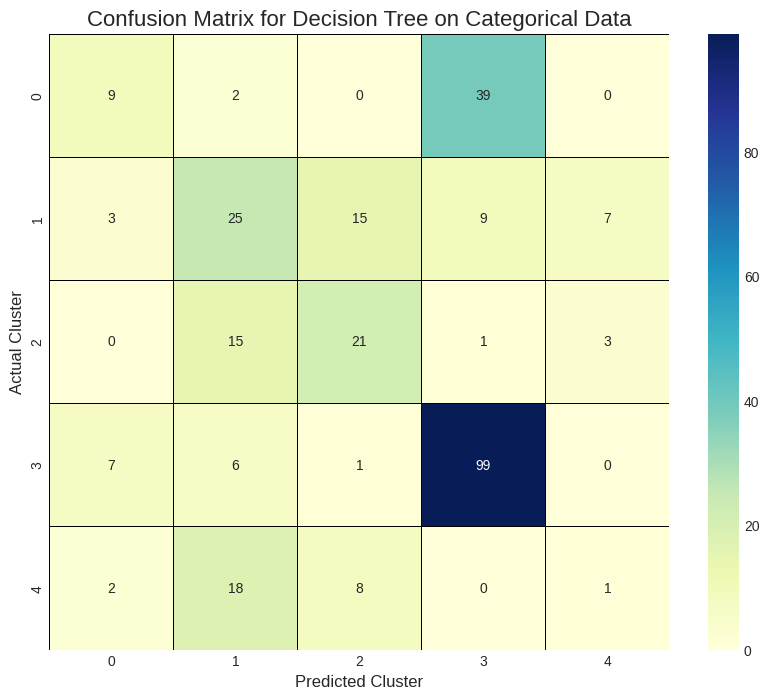

In [ ]:
plt.figure(figsize=(10, 8))
sb.heatmap(conf_mat_cat, annot=True, cmap='YlGnBu', fmt='d', cbar=True, linewidths=.5, linecolor='black')
plt.title('Confusion Matrix for Decision Tree on Categorical Data', fontsize=16)
plt.xlabel('Predicted Cluster', fontsize=12)
plt.ylabel('Actual Cluster', fontsize=12)
plt.show()




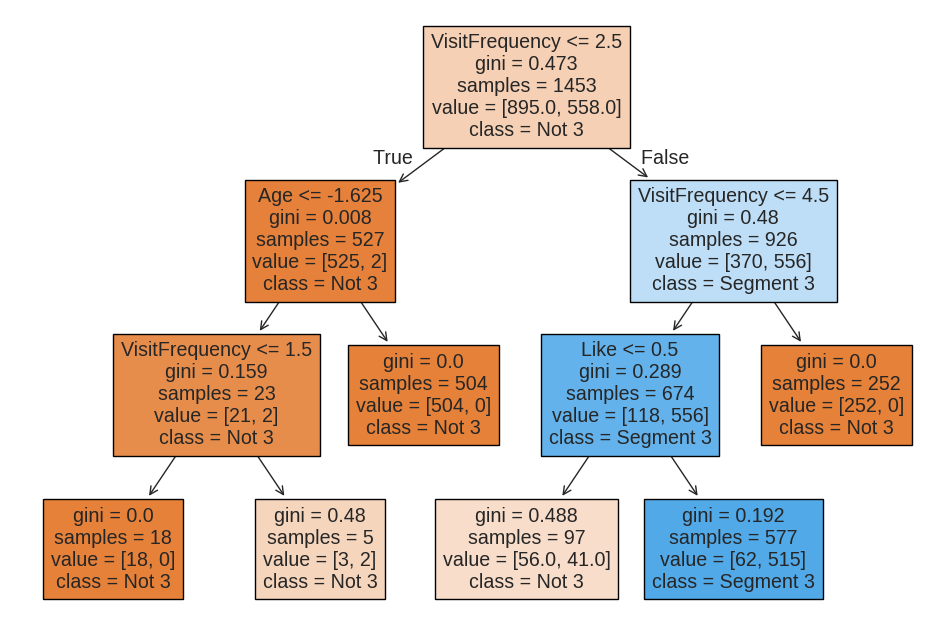

In [ ]:
if all(col in mcdonald.columns for col in ['Like', 'Age', 'VisitFrequency', 'Gender']):
    X_tree = mcdonald[['Like', 'Age', 'VisitFrequency', 'Gender']]
    y_tree = (mcdonald['Cluster'] == 3).astype(int)
    tree = DecisionTreeClassifier(random_state=1234, max_depth=3)
    tree.fit(X_tree, y_tree)
    from sklearn.tree import plot_tree
    plt.figure(figsize=(12, 8))
    plot_tree(tree, feature_names=X_tree.columns, class_names=['Not 3', 'Segment 3'], filled=True)
    plt.show()